In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import subprocess
%matplotlib notebook

# Motion Profile Visualization
This uses our Java robot code to output motion profile points to a `.csv` file we use to plot.

Units are:

- time = ms
- distance = encoder ticks (plot_profile called with inches for convenience)
- velocity = ticks/100ms
- acceleration = ticks/(100ms)<sup>2</sup>

Usage of the profile program to generate data:

```
$ motion <distance in ticks> <max velocity> <time to max velocity> <time to max accel> <period>
```

In [34]:
def plot_profile(d, v_max, v_max_t, a_max_t, period):
    ticks = round(d * 1983.65) # ticks per inch
    subprocess.run("./build/install/motion/bin/motion {} {} {} {} {}".format(ticks, v_max, v_max_t, a_max_t, period), shell=True)
    df = pd.read_csv("output.csv", index_col="Time (ms)")
    df.plot()

Distance to travel 2347 ticks (4 ft.), max velocity 587 ticks/100ms (10 ft/sec), time to max velocity 200ms, time to max acceleration 100ms.

<IPython.core.display.Javascript object>


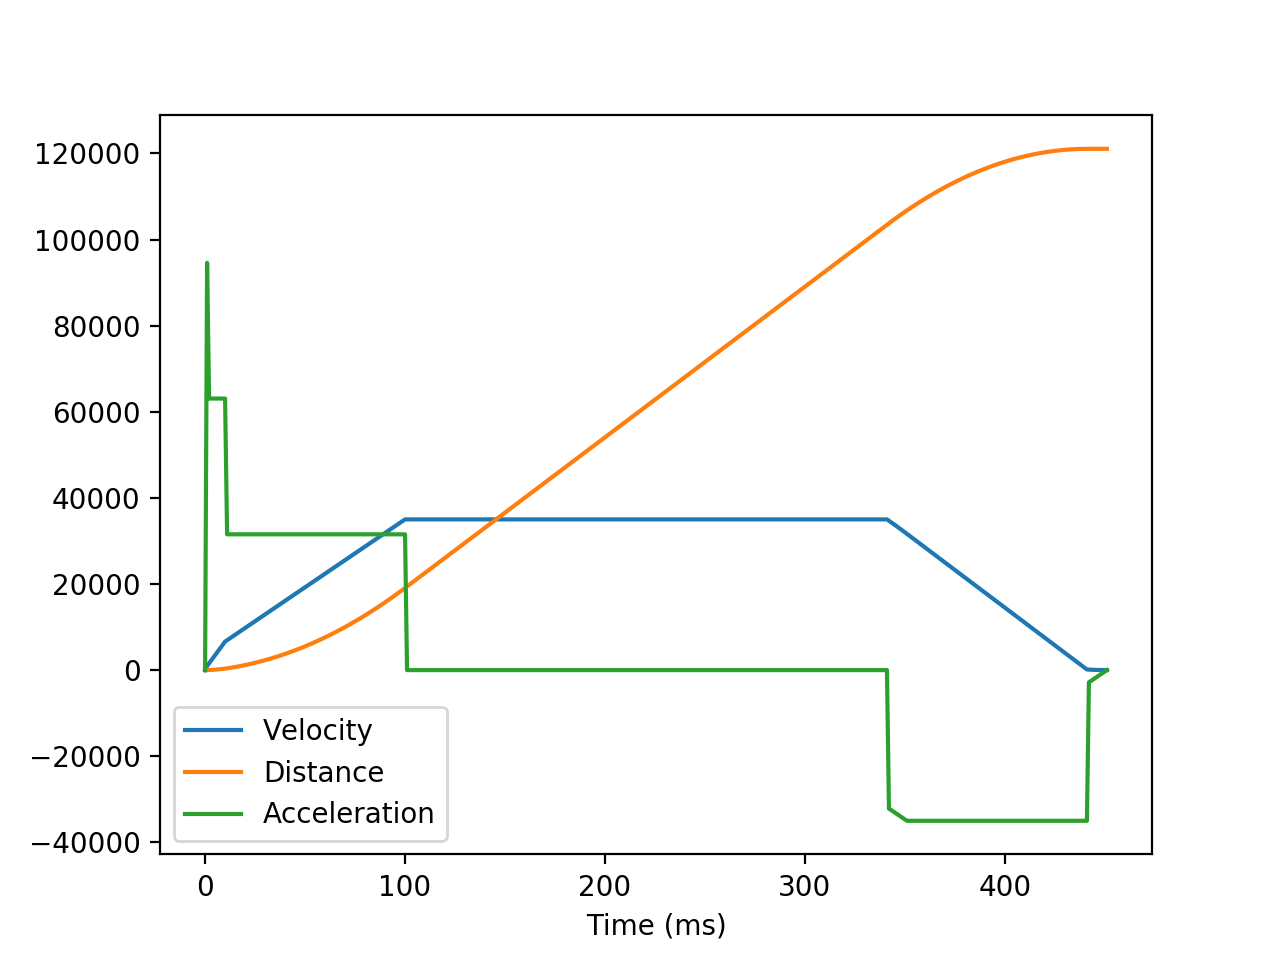

In [35]:
plot_profile(60, 35000, 100, 10, 1)